In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
X, y = make_classification(n_samples=200, n_features=5, n_informative=3, 
                           n_redundant=0, n_classes=3, random_state=42)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': ['auto', None, 0.1, 0.5, 1.0],  # Hanya berlaku untuk 'lsqr' dan 'eigen'
    'n_components': [1, 2, 3],  # Hanya jika jumlah fitur lebih besar
    'tol': [1e-4, 1e-3, 1e-2]
}

In [4]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [5]:
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

In [6]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[18  0  2]
 [14  8  7]
 [ 1  0 10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.90      0.68        20
           1       1.00      0.28      0.43        29
           2       0.53      0.91      0.67        11

    accuracy                           0.60        60
   macro avg       0.69      0.69      0.59        60
weighted avg       0.76      0.60      0.56        60



In [7]:
import matplotlib.pyplot as plt

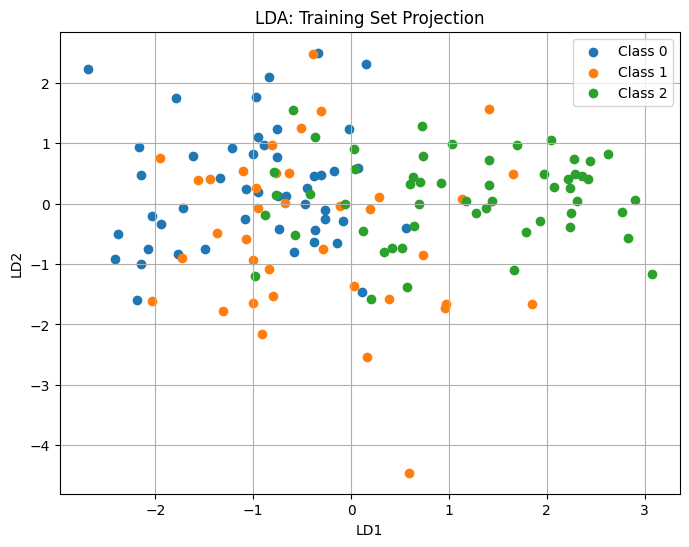

In [8]:
plt.figure(figsize=(8, 6))
for class_value in np.unique(y_train):
    plt.scatter(X_train_lda[y_train == class_value, 0],
                X_train_lda[y_train == class_value, 1],
                label=f'Class {class_value}')
plt.title('LDA: Training Set Projection')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Contoh Grid Search untuk QDA:

param_grid = {
    'reg_param': [0.0, 0.1, 0.5, 1.0],
    'tol': [1e-4, 1e-3, 1e-2]
}